In [1]:
import pandas as pd
#reading dataset
file_path = 'Datasets/Salary_Data.csv'
df = pd.read_csv(file_path)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [2]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [6]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
df.dropna()
# Memisahkan fitur dan target
X = df[['Years of Experience']]
y = df['Salary']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVR
svr = SVR(kernel='linear')  # Ganti kernel sesuai kebutuhan, misalnya 'linear', 'rbf', atau 'poly'
svr.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = svr.predict(X_test_scaled)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Contoh penggunaan model untuk prediksi
new_data = np.array([[30]])  # Use only the 'Years of Experience' feature
new_data_scaled = scaler.transform(new_data)
predicted_salary = svr.predict(new_data_scaled)
print(f'Predicted Salary: {predicted_salary}')



Mean Squared Error: 2536741481.5673695
Predicted Salary: [129797.93654515]


c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


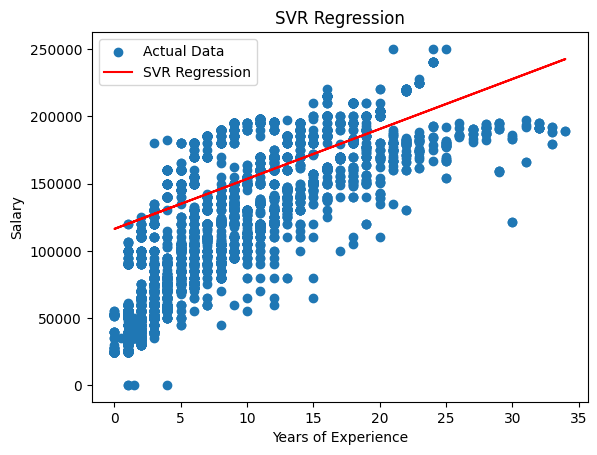

In [7]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5, 1],  # Epsilon in the epsilon-SVR model
}

# Create an SVR model
svr = SVR(kernel='linear')

# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_grid = best_svr.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) for the best model
mse_grid = mean_squared_error(y_test, y_pred_grid)
print(f'Mean Squared Error (Best Model): {mse_grid}')

# Example usage of the best model for prediction
new_data_grid = np.array([[30]])
new_data_scaled_grid = scaler.transform(new_data_grid)
predicted_salary_grid = best_svr.predict(new_data_scaled_grid)
print(f'Predicted Salary (Best Model): {predicted_salary_grid}')


Best Parameters: {'C': 100, 'epsilon': 1}
Mean Squared Error (Best Model): 1009923170.7828296
Predicted Salary (Best Model): [274999.00291026]


c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
